# Introduction to programming for Geoscientists through Python

# Lecture 6 solutions

## [Gerard J. Gorman (g.gorman@imperial.ac.uk)](http://www.imperial.ac.uk/people/g.gorman), [Nicolas Barral (n.barral@imperial.ac.uk)](http://www.imperial.ac.uk/people/n.barral)

* **Read a two-column data file**</br>
The file *data/xy.dat* contains two columns of numbers, corresponding to *x* and *y* coordinates on a curve. The start of the file looks like this:

-1.0000   -0.0000</br>
-0.9933   -0.0087</br>
-0.9867   -0.0179</br>
-0.9800   -0.0274</br>
-0.9733   -0.0374</br>

Make a program that reads the first column into a list *x* and the second column into a list *y*. Then convert the lists to arrays, and plot the curve. Print out the maximum and minimum y coordinates. (Hint: Read the file line by line, split each line into words, convert to float, and append to *x* and *y*.)</br>

In [12]:
## STAGE 1: input

# Open data file
infile = open("data/xy.dat", "r") # "r" is for read

# Initialise empty lists
xlist = []
ylist = []

# Loop through infile and write to x and y lists
for line in infile:
    line = line.split() # convert to list by dropping spaces
    xlist.append(float(line[0])) # take 0th element and covert to float
    ylist.append(float(line[1])) # take 1st element and covert to float


# Close the filehandle
infile.close()

In [13]:
## STAGE 2: view file

# Sanity check -- Let's see what our lists look like for the first 10
print("First ten elements in x and y lists:\n") # N.B. "\n" adds a newline
for i in range(10):
    print("X = %.2f, Y = %.2f" % (xlist[i], ylist[i]))

# Max and min y coords
print("\nThe min and max y are: %.2f and %.2f" % (min(ylist), max(ylist)))

First ten elements in x and y lists:

X = -1.00, Y = -0.00
X = -0.99, Y = -0.01
X = -0.99, Y = -0.02
X = -0.98, Y = -0.03
X = -0.97, Y = -0.04
X = -0.97, Y = -0.05
X = -0.96, Y = -0.06
X = -0.95, Y = -0.07
X = -0.95, Y = -0.08
X = -0.94, Y = -0.09

The min and max y are: -0.95 and 0.95


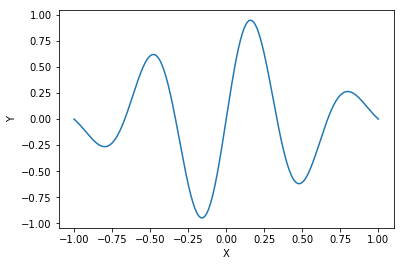

In [14]:
## STAGE 3: plotting

# Convert to array
from numpy import *
xarray = array(xlist)
yarray = array(ylist)

# plot
from pylab import *
plot(xlist, ylist)
xlabel("X")
ylabel("Y")
show()

* **Read a data file**</br>
The files data/density_water.dat and data/density_air.dat contain data about the density of water and air (respectively) for different temperatures. The data files have some comment lines starting with # and some lines are blank. The rest of the lines contain density data: the temperature in the first column and the corresponding density in the second column. The goal of this exercise is to read the data in such a file and plot the density versus the temperature as distinct (small) circles for each data point. Apply the program to both files.

In [15]:
## STAGE 1: work with one file
# precede exactly as before but with modified for loop:
#  line[0] -- refers to the first character in a string
#  != -- boolean operator for 'not equal to'
#  and -- boolean operator, both T/F statements must be met
#  commented lines will start with a #, blank lines will consist of just a newline character '\n'
infile = open("data/density_air.dat", "r")
temp = []
dens = []
for line in infile:
    try:
        t, d = line.split()
        t = float(t)
        d = float(d)
    except:
        continue
    temp.append(t) # N.B. we're now filling out temp and dens lists
    dens.append(d)
infile.close()


# Sanity check:
print(temp)

# ... double check the original file to make sure this is right.

[-10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]


In [16]:
## STAGE 2: 
# Let's write it up as a function
# We'll use exactly the same code as before


def readTempDenFile(filename = "data/density_air.dat"):
    infile = open(filename, "r")
    temp = []
    dens = []
    for line in infile:
        try:
            t, d = line.split()
            t = float(t)
            d = float(d)
        except:
            continue
        temp.append(t) # N.B. we're now filling out temp and dens lists
        dens.append(d)
    infile.close()
    return temp,dens
            
# function defined, let's run it
temp,dens = readTempDenFile() # unpack into two objects temp and dens
print(temp)

[-10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]


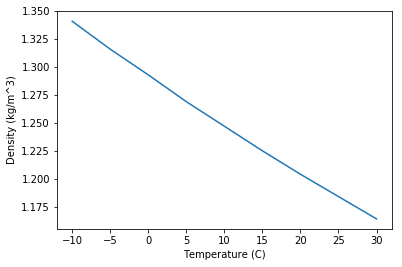

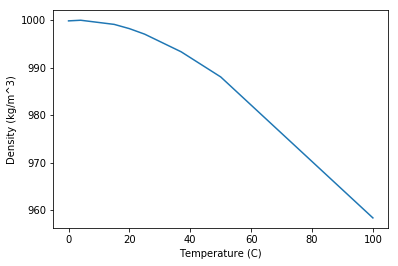

([0.0, 4.0, 15.0, 20.0, 25.0, 37.0, 50.0, 100.0],
 [999.8425, 999.975, 999.1026, 998.2071, 997.0479, 993.3316, 988.04, 958.3665])

In [17]:
## STAGE 3: plotting
# same as before but with the plotting lines of code in our function

# remember to have %pylab inline for ipython
# ... and to import pylab and numpy if not already imported
from pylab import *
from numpy import *

def readTempDenFile(filename = "data/density_air.dat"):
    infile = open(filename, "r")
    temp = []
    dens = []
    for line in infile:
        try:
            t, d = line.split()
            t = float(t)
            d = float(d)
        except:
            continue
        temp.append(t) # N.B. we're now filling out temp and dens lists
        dens.append(d)
    infile.close()
    plot(array(temp), array(dens))
    xlabel("Temperature (C)")
    ylabel("Density (kg/m^3)")
    show()
    return temp,dens

# run function
readTempDenFile()
readTempDenFile("data/density_water.dat")

* **Read acceleration data and find velocities**</br>
A file data/acc.dat contains measurements $a_0, a_1, \ldots, a_{n-1}$ of the acceleration of an object moving along a straight line. The measurement $a_k$ is taken at time point $t_k = k\Delta t$, where $\Delta t$ is the time spacing between the measurements. The purpose of the exercise is to load the acceleration data into a program and compute the velocity $v(t)$ of the object at some time $t$.

In general, the acceleration $a(t)$ is related to the velocity $v(t)$ through $v^\prime(t) = a(t)$. This means that

$$
v(t) = v(0) + \int_0^t{a(\tau)d\tau}
$$

If $a(t)$ is only known at some discrete, equally spaced points in time, $a_0, \ldots, a_{n-1}$ (which is the case in this exercise), we must compute the integral above numerically, for example by the Trapezoidal rule:

$$
v(t_k) \approx v(0) + \Delta t \left(\frac{1}{2}a_0 + \frac{1}{2}a_k + \sum_{i=1}^{k-1}a_i \right), \ \ 1 \leq k \leq n-1. 
$$

We assume $v(0) = 0$ so that also $v_0 = 0$.
Read the values $a_0, \ldots, a_{n-1}$ from file into an array, plot the acceleration versus time, and use the Trapezoidal rule to compute one $v(t_k)$ value. Experiment with different values of $\Delta t$ and $k$.

Populating the interactive namespace from numpy and matplotlib


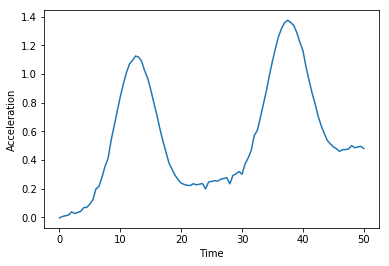

In [18]:
## PART 1: read and plot
# specify libraries
%pylab inline
from pylab import *
from numpy import *

dt = 0.5

# read in acceleration
infile = open("data/acc.dat", "r")
alist = []
for line in infile:
    alist.append(float(line))
infile.close()
aarray = array(alist)
time = array([e*dt for e in range(len(alist))]) # time is specified by dt and the number of elements in acc.dat

# plot
plot(time, aarray)
xlabel("Time")
ylabel("Acceleration")
show()

In [19]:
## PART 2: trapezoidal function

def trap(dt, k, alist):
    if not (1 <= k <= (len(alist) - 1)):
        raise ValueError
    return dt*(.5*alist[0] + .5*alist[k] + sum(alist[:k]))

dt = 2
k = 4
print(trap(dt, k, alist))

0.0820085591101


* **Make a dictionary from a table**</br>
The file *data/constants.txt* contains a table of the values and the dimensions of some fundamental constants from physics. We want to load this table into a dictionary *constants*, where the keys are the names of the constants. For example, *constants['gravitational constant']* holds the value of the gravitational constant (6.67259 $\times$ 10$^{-11}$) in Newton's law of gravitation. Make a function that reads and interprets the text in the file, and thereafter returns the dictionary.

In [20]:
def read_constants(file_path):
    infile = open(file_path, "r")
    constants = {} # An empty dictionary to store the constants that are read in from the file
    infile.readline(); infile.readline() # Skip the first two lines of the file, since these just contain the column names and the separator.
    for line in infile:
        words = line.split() # Split each line up into individual words
        dimension = words.pop() # pop is a list operation that removes the last element from a list and returns it
        value = float(words.pop()) # Again, use pop to obtain the constant itself.
        name = " ".join(words) # After the two 'pop' operations above, the words remaining in the 'words' list must be the name of the constant. Join the individual words together, with spaces inbetween, using .join.
        constants[name] = value # Create a new key-value pair in the dictionary
    return constants

print(read_constants('data/constants.txt'))

{'speed of light': 299792458.0, 'gravitational constant': 6.67259e-11, 'Planck constant': 6.6260755e-34, 'elementary charge': 1.60217733e-19, 'Avogadro number': 6.0221367e+23, 'Boltzmann constant': 1.380658e-23, 'electron mass': 9.1093897e-31, 'proton mass': 1.6726231e-27}


* **Explore syntax differences: lists vs. dictionaries**</br>
Consider this code:

In [21]:
t1 = {} # this specifies a dictionary
t1[0] = -5 # create a new key called 0, give it the value -5
t1[1] = 10.5 # create a new key called 1, give it the value 10.5

print(t1) # shows the contents of 0 and 1

{0: -5, 1: 10.5}


Explain why the lines above work fine while the ones below do not:

In [22]:
t2 = [] # this specifies a list
t2[0] = -5
t2[1] = 10.5
# cannot work, raises and IndexError
# [] notation is for indexing in lists
# this is trying to specify the 0th element is -5
# IndexError is raised because the intial list has no dimensions, and therefore [0] is out of index
# Dictionaries behave differently, the [] notation will create a new key and add the specified element to the dictionary

IndexError: list assignment index out of range

What must be done in the last code snippet to make it work properly?

In [23]:
## To make it work properly we have two options

# 1. specify the list's dimension before asignment
t2 = [0]*2 # a list containing two 0s
t2[0] = -5
t2[1] = 10.5
print(t2)
del t2

# 2. start with a dimensionless list, but append new elements
t2 = []
t2.append(-5)
t2.append(10.5)
print(t2)

[-5, 10.5]
[-5, 10.5]


* **Compute the area of a triangle**</br>
An arbitrary triangle can be described by the coordinates of its three vertices: $(x_1, y_1), (x_2, y_2), (x_3, y_3)$, numbered in a counterclockwise direction. The area of the triangle is given by the formula:

$A = \frac{1}{2}|x_2y_3 - x_3y_2 - x_1y_3 + x_3y_1 + x_1y_2 - x_2y_1|.$

Write a function *area(vertices)* that returns the area of a triangle whose vertices are specified by the argument vertices, which is a nested list of the vertex coordinates. For example, vertices can be [[0,0], [1,0], [0,2]] if the three corners of the triangle have coordinates (0, 0), (1, 0), and (0, 2).

Then, assume that the vertices of the triangle are stored in a dictionary and not a list. The keys in the dictionary correspond to the vertex number (1, 2, or 3) while the values are 2-tuples with the x and y coordinates of the vertex. For example, in a triangle with vertices (0, 0), (1, 0), and (0, 2) the vertices argument becomes:

In [24]:
## STAGE 1: area function on list

def area(vertices):
    # nb. vertices = [[x1,y1],[x2,y2],[x3,y3]]
    x2y3 = vertices[1][0] * vertices[2][1]
    x3y2 = vertices[2][0] * vertices[1][1]
    x1y3 = vertices[0][0] * vertices[2][1]
    x3y1 = vertices[2][0] * vertices[0][1]
    x1y2 = vertices[0][0] * vertices[1][1]
    x2y1 = vertices[1][0] * vertices[0][1]
    return .5*(x2y3 - x3y2 - x1y3 + x3y1 + x1y2 - x2y1)

print(area([[0.0,0.0],[1.0,0.0],[0.0,2.0]]))

1.0


In [25]:
## STAGE 2: area function on dict

def area(vertices):
    # nb. vertices = {v1: (x,y)}
    x2y3 = vertices[2][0] * vertices[3][1]
    x3y2 = vertices[3][0] * vertices[2][1]
    x1y3 = vertices[1][0] * vertices[3][1]
    x3y1 = vertices[3][0] * vertices[1][1]
    x1y2 = vertices[1][0] * vertices[2][1]
    x2y1 = vertices[2][0] * vertices[1][1]
    return .5*(x2y3 - x3y2 - x1y3 + x3y1 + x1y2 - x2y1)

print(area({1: (0,0), 2: (1,0), 3: (0,2)}))

1.0


* **Improve a program**</br>
The file *data/densities.dat* contains a table of densities of various substances measured in g/cm$^3$. The following program reads the data in this file and produces a dictionary whose keys are the names of substances, and the values are the corresponding densities.

In [26]:
def read_densities(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        words = line.split()
        density = float(words[-1])
    
        if len(words[:-1]) == 2:
            substance = words[0] + ' ' + words[1]
        else:
            substance = words[0]
        
        densities[substance] = density
    
    infile.close()
    return densities

densities = read_densities('data/densities.dat')

One problem we face when implementing the program above is that the name of the substance can contain one or two words, and maybe more words in a more comprehensive table. The purpose of this exercise is to use string operations to shorten the code and make it more general. Implement the following two methods in separate functions in the same program, and control that they give the same result.

1. Let *substance* consist of all the words but the last, using the join method in string objects to combine the words.
2. Observe that all the densities start in the same column file and use substrings to divide line into two parts. (Hint: Remember to strip the first part such that, e.g., the density of ice is obtained as *densities['ice']* and not *densities['ice     ']*.)

In [27]:
## STAGE 1: using string function join

def read_densities(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        words = line.split()
        density = float(words.pop()) # pop is a list operation that removes the last element from a list and returns it
        substance = "_".join(words) # join the remaining words with _
        densities[substance] = density
    infile.close()
    return densities

densities = read_densities('data/densities.dat')
print(densities)

{'air': 0.0012, 'gasoline': 0.67, 'ice': 0.9, 'pure_water': 1.0, 'seawater': 1.025, 'human_body': 1.03, 'limestone': 2.6, 'granite': 2.7, 'iron': 7.8, 'silver': 10.5, 'mercury': 13.6, 'gold': 18.9, 'platinium': 21.4, 'Earth_mean': 5.52, 'Earth_core': 13.0, 'Moon': 3.3, 'Sun_mean': 1.4, 'Sun_core': 160.0, 'proton': 280000000000000.0}


In [28]:
## STAGE 2: Using string slicing and operations

def read_densities(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        density = float(line[12:]) # column 13 onwards
        substance = line[:12] # upto coumn 12
        substance = substance.strip() # remove trailing spaces
        substance = substance.replace(" ", "_") # replace spaces with _
        densities[substance] = density
    infile.close()
    return densities

densities = read_densities('data/densities.dat')

* **Write function data to a file**</br>
We want to dump $x$ and $f(x)$ values to a file named function_data.dat, where the $x$ values appear in the first column and the $f(x)$ values appear in the second. Choose $n$ equally spaced $x$ values in the interval [-4, 4]. Here, the function $f(x)$ is given by:

$f(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)$</br></br>

In [29]:
# libs
from numpy import *
from math import pi

# define our function
def f(x):
    return (1.0/sqrt(2.0*pi))*exp(-.5*x**2.0)

# let's make our x
xarray = linspace(-4.0, 4.0, 100)
fxs = f(xarray)

# let's zip them up for a simple for loop when writing out
data = zip(xarray, fxs) # this combines each element into a tuple e.g. [(xarray1, fxs1), (xarray2, fxs2) ...]

# write out
outfile = open("ex5_out.dat", "w") # w is for writing!
for x,y in data:
    outfile.write("X = %.2f Y = %.2f" % (x, y))
    outfile.write("\n")   # ensure newline
outfile.close()